In [1]:
#from google.colab import drive
#drive.mount('/content/drive')
# !pip install keras --user
# !pip install tensorflow-gpu --user
# !conda install -c conda-forge keras-preprocessing

In [ ]:
# from numba import cuda 
# device = cuda.get_current_device()
# device.reset()
# import tensorflow as tf 
# tf.keras.backend.clear_session()
# tf.keras.backend.reset_uids()


In [3]:
#!pip install --upgrade pandas

In [21]:
import time
from scipy.io import wavfile
from IPython.display import Audio
from IPython.core.display import display
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import librosa
import librosa.display
#from folder_locations import  data_folder, bird_train, bird_test, human_folder, human_clips_folder, warblr_folder
import os
#import plotly.express as px
#import sweetviz as sv
from sklearn.utils import shuffle
import pickle
import random
from sklearn.model_selection import GridSearchCV
#from keras.wrappers.scikit_learn import KerasClassifier


random_number = 93
bird_sr = 44100
human_sr = 48000
print(bird_sr, human_sr)

44100 48000


In [34]:
import os
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")
%matplotlib inline

from tqdm import tqdm_notebook, tnrange
from itertools import chain
from skimage.io import imread, imshow, concatenate_images
from skimage.transform import resize
from skimage.morphology import label
from sklearn.model_selection import train_test_split

import tensorflow as tf


from tensorflow.keras import Input
from keras.models import Model, load_model
from keras.layers import Input, BatchNormalization, Activation, Dense, Dropout
from keras.layers.core import Lambda, RepeatVector, Reshape
from keras.layers.convolutional import Conv2D, Conv2DTranspose
from keras.layers.pooling import MaxPooling2D, GlobalMaxPool2D
from keras.layers.merge import concatenate, add
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam 
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

ModuleNotFoundError: No module named 'keras.models'

In [7]:
#!pip install keras_tuner --upgrade

import keras_tuner as kt

In [7]:
import tensorflow as tf; print(tf.__version__)

2.7.0


In [8]:
def padding(array, xx, yy):
    """
    :param array: numpy array
    :param xx: desired height
    :param yy: desired width
    :return: padded array
    """

    h = array.shape[0]
    w = array.shape[1]

    a = (xx - h) // 2
    aa = xx - a - h

    b = (yy - w) // 2
    bb = yy - b - w

    return np.pad(array, pad_width=((a, aa), (b, bb)), mode='constant')

In [9]:
#read the pickle file
picklefile = open('df_mixed.pkl', 'rb')
#unpickle the dataframe
df_mixed = pickle.load(picklefile)
#close file
picklefile.close()
del picklefile

In [7]:
df_mixed.head()

itemid  hasbird  \
0  759808e5-f824-401e-9058        1   
1  1d94fc4a-1c63-4da0-9cac        1   
2  bb0099ce-3073-4613-8557        1   
3  c4c67e81-9aa8-4af4-8eb7        1   
4  6332d960-6f57-4ecc-8d1a        1   

                                           client_id  \
0  91a3b9e9e1b80c81b297cf32bf4157d1709d438bd21b66...   
1  9911f704c287f6a7eb3bf91dce7cc3286afb349caa1ff9...   
2  418763f1d2971907b3bd0e8ef3950483d07ed568356125...   
3  24323eab65250388986205f621d2e1944e9edf36decf4a...   
4  309967f189c81824e7a3568d182867414d40e53f0d90f1...   

                           path  \
0    common_voice_en_548351.mp3   
1  common_voice_en_17790311.mp3   
2  common_voice_en_17873663.mp3   
3    common_voice_en_205648.mp3   
4  common_voice_en_18210132.mp3   

                                            sentence  up_votes  down_votes  \
0                      "No," the alchemist answered.       2.0         0.0   
1       There was an angry red gash on his forehead.       2.0         0.0   
2  At a round table there's no dispute about the ...       2.0         0.0   
3                  The doctor cried after his birth.       2.0         0.0   
4  How can we obtain a priori knowledge for each ...       2.0         1.0   

        age  gender       accent locale segment  \
0  thirties  female  philippines     en     NaN   
1   fifties  female      england     en     NaN   
2  fourties    male           us     en     NaN   
3  thirties    male           us     en     NaN   
4  twenties    male           us     en     NaN   

                                         mixed_array  \
0  [[0.1802, 0.4038, 0.3875, 0.3928, 0.382, 0.391...   
1  [[0.07733, 0.0773, 0.07733, 0.07733, 0.07733, ...   
2  [[0.02214, 0.02214, 0.02214, 0.02298, 0.01965,...   
3  [[64.4, 64.4, 64.4, 63.56, 70.3, 79.7, 70.4, 6...   
4  [[3.258, 3.258, 3.258, 3.258, 3.258, 3.258, 3....   

                                         human_array  
0  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...  
1  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...  
2  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...  
3  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...  
4  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...

In [10]:
df_mixed['human_array'] = df_mixed['human_array'].apply(lambda row: row[:,:704])
df_mixed['human_label'] = df_mixed['human_array'].apply(lambda row: row > row.mean()*0.05)
df_mixed['mixed_array'] = df_mixed['mixed_array'].apply(lambda row: row[:,:704])
df_mixed['human_label'] = df_mixed['human_label'].apply(lambda row: row[:,:704])

#df_mixed['mixed_array'] = df_mixed['mixed_array'].apply(lambda row: padding(row,864,864))
#df_mixed['human_label'] = df_mixed['human_label'].apply(lambda row: padding(row,864,864))

(128, 704) (128, 704) (128, 704)


C:\ProgramData\Anaconda3\lib\site-packages\librosa\core\spectrum.py:1559: RuntimeWarning: divide by zero encountered in log10
  log_spec = 10.0 * np.log10(np.maximum(amin, magnitude))


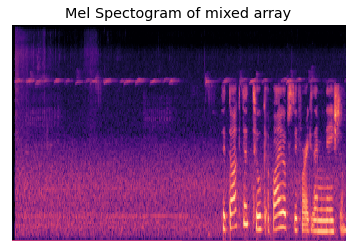

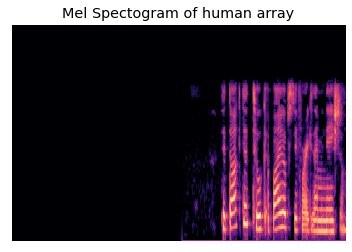

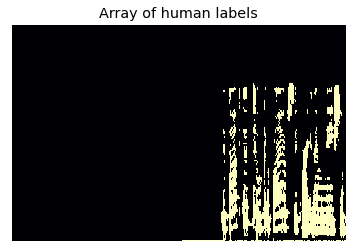

In [11]:

def plot_compare(row):
    fig, ax = plt.subplots()
    librosa.display.specshow(librosa.power_to_db(df_mixed['mixed_array'][row], ref=np.max), ax=ax)
    ax.set(title='Mel Spectogram of mixed array')

    fig, ax = plt.subplots()
    librosa.display.specshow(librosa.power_to_db(df_mixed['human_array'][row], ref=np.max), ax=ax)
    ax.set(title='Mel Spectogram of human array')
    
    fig, ax = plt.subplots()
    librosa.display.specshow(librosa.power_to_db(df_mixed['human_label'][row], ref=np.max), ax=ax)
    ax.set(title='Array of human labels')
    
row = 32   
plot_compare(row)


print(df_mixed['mixed_array'][row].shape,df_mixed['human_array'][row].shape,df_mixed['human_label'][row].shape)

****

In [12]:
X, y = (df_mixed['mixed_array'], df_mixed['human_label'])
del df_mixed

In [13]:
for i in range(len(X)):
    if X[i].shape[1] < 704:
        print(i)

X.drop(index=[842,1484], inplace=True)
y.drop(index=[842,1484], inplace=True)

842
1484


In [14]:
input_shape = (X[0].shape + (int(1),))

X = np.stack(X).reshape((len(X),input_shape[0],input_shape[1],input_shape[2])).astype(np.float16)
y = np.stack(y).reshape((len(y),input_shape[0],input_shape[1],input_shape[2]))

In [15]:
# Split train, test and validation , 80,10,10

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_number)

X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=random_number)



In [16]:
del X, y

# First step: U-Net (source separation model)

In [17]:
# Set some parameters
im_height , im_width = (128,704) #df_mixed['mixed_array'][0].shape
border = 5

In [18]:
def conv2d_block(input_tensor, n_filters, kernel_size = 3, batchnorm = True):
    """Function to add 2 convolutional layers with the parameters passed to it"""
    # first layer
    x = Conv2D(filters = n_filters, kernel_size = (kernel_size, kernel_size),\
              kernel_initializer = 'he_normal', padding = 'same')(input_tensor)
    if batchnorm:
        x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    # second layer
    x = Conv2D(filters = n_filters, kernel_size = (kernel_size, kernel_size),\
              kernel_initializer = 'he_normal', padding = 'same')(input_tensor)
    if batchnorm:
        x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    return x
    
def get_unet(input_img, n_filters = 16, dropout = 0.1, kernel_size = 3, activation='sigmoid', batchnorm = True):
    """Function to define the UNET Model"""
    # Contracting Path
    c1 = conv2d_block(input_img, n_filters * 1, kernel_size = kernel_size, batchnorm = batchnorm)
    p1 = MaxPooling2D((2, 2))(c1)
    p1 = Dropout(dropout)(p1)
    
    c2 = conv2d_block(p1, n_filters * 2, kernel_size = kernel_size, batchnorm = batchnorm)
    p2 = MaxPooling2D((2, 2))(c2)
    p2 = Dropout(dropout)(p2)
    
    c3 = conv2d_block(p2, n_filters * 4, kernel_size = kernel_size, batchnorm = batchnorm)
    p3 = MaxPooling2D((2, 2))(c3)
    p3 = Dropout(dropout)(p3)
    
    c4 = conv2d_block(p3, n_filters * 8, kernel_size = kernel_size, batchnorm = batchnorm)
    p4 = MaxPooling2D((2, 2))(c4)
    p4 = Dropout(dropout)(p4)
    
    c5 = conv2d_block(p4, n_filters = n_filters * 16, kernel_size = kernel_size, batchnorm = batchnorm)
    
    # Expansive Path
    u6 = Conv2DTranspose(n_filters * 8, (3, 3), strides = (2, 2), padding = 'same')(c5)
    u6 = concatenate([u6, c4])
    u6 = Dropout(dropout)(u6)
    c6 = conv2d_block(u6, n_filters * 8, kernel_size = kernel_size, batchnorm = batchnorm)
    
    u7 = Conv2DTranspose(n_filters * 4, (3, 3), strides = (2, 2), padding = 'same')(c6)
    u7 = concatenate([u7, c3])
    u7 = Dropout(dropout)(u7)
    c7 = conv2d_block(u7, n_filters * 4, kernel_size = kernel_size, batchnorm = batchnorm)
    
    u8 = Conv2DTranspose(n_filters * 2, (3, 3), strides = (2, 2), padding = 'same')(c7)
    u8 = concatenate([u8, c2])
    u8 = Dropout(dropout)(u8)
    c8 = conv2d_block(u8, n_filters * 2, kernel_size = kernel_size, batchnorm = batchnorm)
    
    u9 = Conv2DTranspose(n_filters * 1, (3, 3), strides = (2, 2), padding = 'same')(c8)
    u9 = concatenate([u9, c1])
    u9 = Dropout(dropout)(u9)
    c9 = conv2d_block(u9, n_filters * 1, kernel_size = kernel_size, batchnorm = batchnorm)
    
    outputs = Conv2D(1, (1, 1), activation=activation)(c9)
    model = Model(inputs=[input_img], outputs=[outputs])
    return model

In [19]:
def build_model(dropout, kernel_size, activation, loss, learning_rate, metrics = 'accuracy'):
    input_img = Input((im_height, im_width, int(1)), name='input')
    model = get_unet(input_img, dropout=dropout, kernel_size=kernel_size, activation=activation, batchnorm=True)
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss=loss, metrics=metrics)
    return model

In [22]:
# model = build_model(dropout = 0.1, kernel_size = 3, activation='sigmoid',loss = "mse", learning_rate=0.003, metrics=[tf.keras.metrics.MeanIoU(num_classes=2)] )
# model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input (InputLayer)             [(None, 128, 704, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_1 (Conv2D)              (None, 128, 704, 16  160         ['input[0][0]']                  
                                )                                                                 
                                                                                                  
 batch_normalization_1 (BatchNo  (None, 128, 704, 16  64         ['conv2d_1[0][0]']               
 rmalization)                   )                                                             

In [23]:
#%load_ext tensorboard
#%tensorboard --logdir logs
# tf.keras.backend.clear_session()

# gpus = tf.config.list_physical_devices('GPU')
# if gpus:
#     for gpu in gpus:
#         tf.config.experimental.set_memory_growth(gpu,True)



# from tensorflow.python.client import device_lib
# print(device_lib.list_local_devices())




In [24]:
# import datetime
# logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
# tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

In [20]:
#!pip install focal-lossp install tf-nightly
#!pip install focal-loss --user

# def memory():
#     import os
#     import psutil
#     pid = os.getpid()
#     py = psutil.Process(pid)
#     memoryUse = py.memory_info()[0]/2.**30  # memory use in GB...I think
#     print('memory use:', memoryUse)
    
# memory()
#tf.keras.backend.clear_session()
tf.config.list_physical_devices('GPU')

# gpus = tf.config.list_physical_devices('GPU')
# if gpus:
#     for gpu in gpus:
#         tf.config.experimental.set_memory_growth(gpu,True)

In [22]:
#memory leak, trying to find out the cause

!nvidia-smi

Fri Dec  3 14:17:01 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 496.13       Driver Version: 496.13       CUDA Version: 11.5     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0  On |                  N/A |
| 40%   29C    P8    21W / 200W |   6438MiB /  8192MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [26]:
tf.keras.backend.clear_session()
model = build_model(dropout = 0.1, kernel_size = 3, activation='sigmoid',loss = 'binary_crossentropy', learning_rate=0.01, metrics=[tf.keras.metrics.IoU(num_classes=2,target_class_ids=[0])] )

results = model.fit(X_train
                    , y_train
                    , batch_size=10 #32
                    , epochs=10
                    , verbose=1
                    , validation_data=(X_val , y_val))
                    #, callbacks=[tensorboard_callback])

InternalError: Failed copying input tensor from /job:localhost/replica:0/task:0/device:CPU:0 to /job:localhost/replica:0/task:0/device:GPU:0 in order to run _EagerConst: Dst tensor is not initialized.

In [27]:
tf.keras.backend.clear_session()

!nvidia-smi

Fri Dec  3 14:30:58 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 496.13       Driver Version: 496.13       CUDA Version: 11.5     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0  On |                  N/A |
| 40%   29C    P8    21W / 200W |   5176MiB /  8192MiB |      2%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# !pip uninstall keras -y
# !pip uninstall keras-nightly -y
# !pip uninstall keras-Preprocessing -y
# !pip uninstall keras-vis -y
# !pip uninstall tensorflow -y
# !pip uninstall tensorflow-gpu



Found existing installation: keras 2.7.0


ERROR: Cannot uninstall keras 2.7.0, RECORD file not found. You might be able to recover from this via: 'pip install --force-reinstall --no-deps keras==2.7.0'.


In [29]:
# !pip install tensorflow-gpu
# !pip install keras

  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)


ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: 'c:\\users\\bobtu\\appdata\\roaming\\python\\python39\\site-packages\\keras-2.7.0.dist-info\\METADATA'



ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: 'c:\\users\\bobtu\\appdata\\roaming\\python\\python39\\site-packages\\keras-2.7.0.dist-info\\METADATA'



In [28]:
#         #Initialize all variables
# with tf.Graph().as_default(), tf.Session() as sess:
#     tf.contrib.keras.backend.set_session(sess)
#     init_op = tf.global_variables_initializer()
#     sess.run(init_op)

#     sess.close()

#     tf.reset_default_graph()


AttributeError: module 'tensorflow' has no attribute 'Session'

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
row = 40
threshold = 0.2


map = y_pred[row].reshape((128, 704)) > threshold

fig, ax = plt.subplots()
librosa.display.specshow(librosa.power_to_db(y_test[row].reshape((128, 704)), ref=np.max), ax=ax)

fig, ax = plt.subplots()
librosa.display.specshow(librosa.power_to_db(map, ref=np.max), ax=ax)



fig, ax = plt.subplots()
librosa.display.specshow(librosa.power_to_db(np.where((X_test[row].reshape((128, 704)) > 0)  != map, X_test[row].reshape((128, 704)),0), ref=np.max), ax=ax)





In [ ]:
censored_human = np.where((X_test[row].reshape((128, 704)) > 0)  != map, X_test[row].reshape((128, 704)), 0 )
censored_human = librosa.feature.inverse.mel_to_audio(censored_human.astype('float32'), sr=bird_sr)

uncensored_human = librosa.feature.inverse.mel_to_audio(X_test[row].reshape((128, 704)).astype('float32'), sr=bird_sr)


In [ ]:
Audio(censored_human, autoplay = True, rate=bird_sr)

---
***Voice Activity Detection***

---

# work in progress:


In [ ]:
!pip install -q torchaudio soundfile

import glob
import torch
torch.set_num_threads(1)

from IPython.display import Audio
from pprint import pprint

model, utils = torch.hub.load(repo_or_dir='snakers4/silero-vad',
                              model='silero_vad',
                              force_reload=True)

(get_speech_ts,
 get_speech_ts_adaptive,
 save_audio,
 read_audio,
 state_generator,
 single_audio_stream,
 collect_chunks) = utils

files_dir = torch.hub.get_dir() + '/snakers4_silero-vad_master/files'

In [ ]:
wav = read_audio(f'{files_dir}/en.wav')



# get speech timestamps from full audio file
speech_timestamps = get_speech_ts(torch.from_numpy(uncensored_human), model,
                                  num_steps=4)


if len(speech_timestamps) > 0:
    label = 1
else:
    label = 0

pprint(label)

In [ ]:
len(y_val)